In [23]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import*
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile   # instead of execute command transpile will work
from qiskit.visualization import plot_histogram 
from math import gcd
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [24]:
def c_amod15(a, power):
    qc = QuantumCircuit(2)
    for iteration in range(power):
        qc.swap(0,1)
        for q in range(2):
            qc.x(q)
    qc = qc.to_gate() # turning this circuit into gate and plug with shor algorithm
    qc.name = "%i^%i mod 15" % (a, power)
    c_qc = qc.control()
    return c_qc

In [25]:
n =2
a =4

In [26]:
def qft(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT"
    return qc

In [27]:
qc = QuantumCircuit(n + 2, n)
for q in range(n):
    qc.h(q)
    #qc.x(1+n)
for q in range(n):
    qc.append(c_amod15(a, 2**q), [q] + [i+n for i in range(2)])
qc.draw(initial_state=True,output='mpl')
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=4, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(4, 'q'), 0), Qubit(QuantumRegister(4, 'q'), 1), Qubit(QuantumRegister(4, 'q'), 2), Qubit(QuantumRegister(4, 'q'), 3)), clbits=())

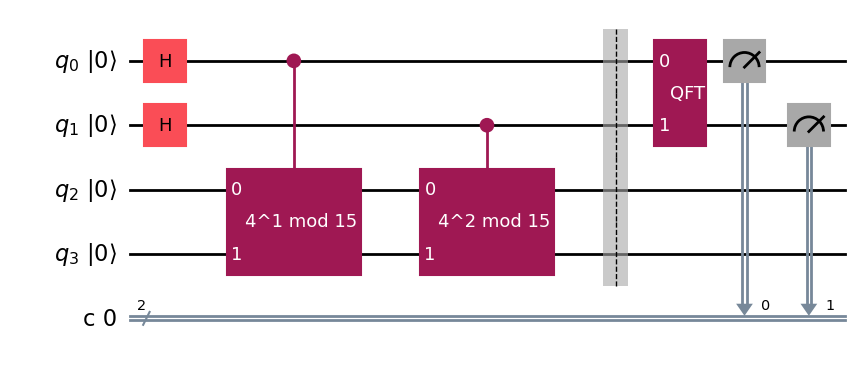

In [35]:
qc.draw(initial_state=True,output='mpl')

In [34]:
print(qc)

     ┌───┐                               ░ ┌──────┐┌─┐   
q_0: ┤ H ├───────■───────────────────────░─┤0     ├┤M├───
     ├───┤       │                       ░ │  QFT │└╥┘┌─┐
q_1: ┤ H ├───────┼──────────────■────────░─┤1     ├─╫─┤M├
     └───┘┌──────┴──────┐┌──────┴──────┐ ░ └──────┘ ║ └╥┘
q_2: ─────┤0            ├┤0            ├─░──────────╫──╫─
          │  4^1 mod 15 ││  4^2 mod 15 │ ░          ║  ║ 
q_3: ─────┤1            ├┤1            ├─░──────────╫──╫─
          └─────────────┘└─────────────┘ ░          ║  ║ 
c: 2/═══════════════════════════════════════════════╩══╩═
                                                    0  1 


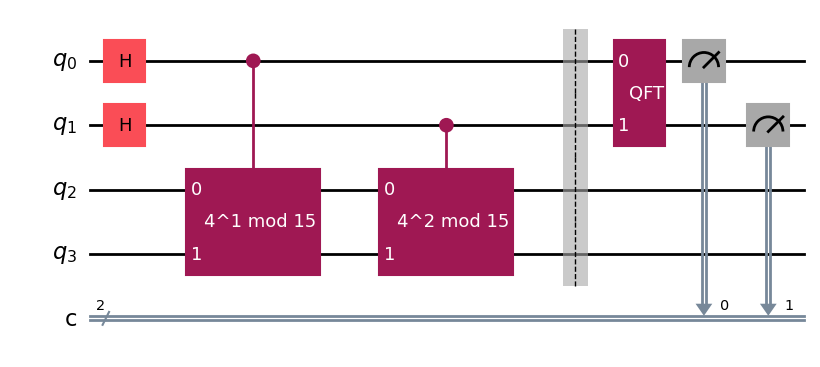

In [33]:
qc.draw('mpl')

Probabilities: {'00': 0.5043333333333333, '10': 0.49566666666666664}


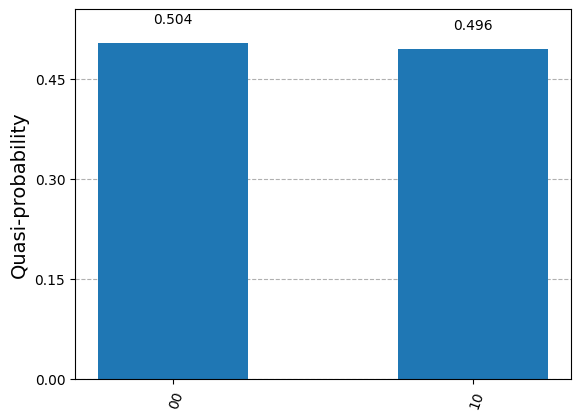

In [31]:
# from qiskit import *
# from pylatexenc import*
# from qiskit import transpile
# qc.append(qft(n), range(n))
# qc.measure(range(n), range(n))
# qc.draw(initial_state=True,output='mpl')
# sim=Aer.get_backend('qasm_simulator')
# result=execute(qc,backend=sim,shots=3000).result()
# plot_histogram(result.get_counts(qc))

from qiskit import *
from pylatexenc import*
from qiskit import transpile
qc.append(qft(n), range(n))
qc.measure(range(n), range(n))
qc.draw(initial_state=True,output='mpl')
sim=Aer.get_backend('qasm_simulator')
# Transpile the circuit for the backend
qc_transpiled = transpile(qc, backend=sim)
job = sim.run(qc_transpiled, shots=3000)
result = job.result()
# Get raw counts
counts = result.get_counts(qc)
# Calculate probabilities
total_shots = sum(counts.values())
probabilities = {state: count / total_shots for state, count in counts.items()}
# Print probabilities
print("Probabilities:", probabilities)
# Plot probabilities
plot_histogram(probabilities)
# plot_histogram(result.get_counts(qc))

In [36]:
from qiskit import IBMQ
from qiskit import*
IBMQ.load_account()
provider =IBMQ.get_provider('ibm-q')
qccmp =provider.get_backend('ibmq_manila')
job = execute(qc, backend=qccmp, shots = 1000)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(qc))

ImportError: cannot import name 'IBMQ' from 'qiskit' (/Users/fmachemist/qiskit/lib/python3.12/site-packages/qiskit/__init__.py)

In [38]:
 from qiskit import QuantumCircuit
 from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
 # Create empty circuit
 example_circuit = QuantumCircuit(2)
 example_circuit.measure_all()
 
 

In [39]:
print(example_circuit)

         ░ ┌─┐   
   q_0: ─░─┤M├───
         ░ └╥┘┌─┐
   q_1: ─░──╫─┤M├
         ░  ║ └╥┘
meas: 2/════╩══╩═
            0  1 
